# Importing libraries 

In [7]:
import numpy as  np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_profiling 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.utils import resample
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
data_air_delay = pd.read_csv("airlines_delay.csv")
data_air_delay

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


In [9]:
data_air_delay.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
data_air_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [11]:
data_air_delay.nunique()

Flight         6585
Time           1131
Length          426
Airline          18
AirportFrom     293
AirportTo       293
DayOfWeek         7
Class             2
dtype: int64

# EDA

<AxesSubplot:xlabel='Airline', ylabel='count'>

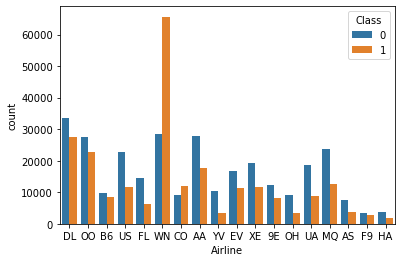

In [12]:
sns.countplot(data=data_air_delay,x="Airline",hue="Class")

WN Airline has the only airline that often delayed than other airline.

<AxesSubplot:xlabel='Airline', ylabel='Length'>

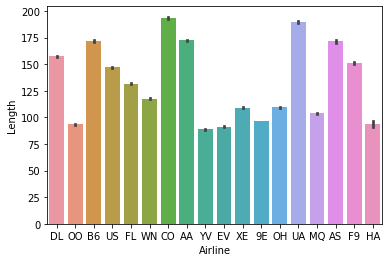

In [13]:
sns.barplot(data=data_air_delay,x="Airline",y="Length")

CO & UA have the longest average flight time.

<AxesSubplot:xlabel='Airline', ylabel='Time'>

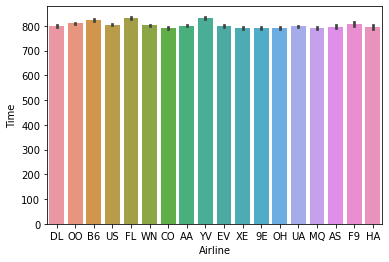

In [14]:
sns.barplot(data=data_air_delay,x="Airline",y="Time")

Almost all of the airline have the same departure time

# Data Processing

In [15]:
df = data_air_delay.drop("Flight",axis=1)
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,141.0,DL,ATL,HOU,1,0
1,360.0,146.0,OO,COS,ORD,4,0
2,1170.0,143.0,B6,BOS,CLT,3,0
3,1410.0,344.0,US,OGG,PHX,6,0
4,692.0,98.0,FL,BMI,ATL,4,0


In [16]:
df["Airline"].unique()

array(['DL', 'OO', 'B6', 'US', 'FL', 'WN', 'CO', 'AA', 'YV', 'EV', 'XE',
       '9E', 'OH', 'UA', 'MQ', 'AS', 'F9', 'HA'], dtype=object)

In [17]:
label_encoder = preprocessing.LabelEncoder()
df["Airline"] = label_encoder.fit_transform(df["Airline"])
df["Airline"].unique()

array([ 5, 12,  3, 14,  8, 15,  4,  1, 17,  6, 16,  0, 11, 13, 10,  2,  7,
        9])

In [18]:
df["AirportFrom"].unique()

array(['ATL', 'COS', 'BOS', 'OGG', 'BMI', 'MSY', 'EWR', 'DFW', 'BWI',
       'CRW', 'LGB', 'BIS', 'CLT', 'IAH', 'LAX', 'JAX', 'SAV', 'CLE',
       'FLL', 'SAN', 'BHM', 'ROC', 'DTW', 'STT', 'AUS', 'DCA', 'PHX',
       'EYW', 'IND', 'JFK', 'ORD', 'PBI', 'SFO', 'MIA', 'DSM', 'SLC',
       'PHL', 'BZN', 'GRB', 'MBS', 'SBA', 'TYS', 'MSP', 'DEN', 'SAT',
       'BUF', 'RIC', 'SEA', 'PDX', 'LAS', 'IAD', 'HNL', 'BDL', 'MOT',
       'PSE', 'CPR', 'SNA', 'STL', 'CVG', 'PIT', 'HSV', 'SGF', 'RDU',
       'MEM', 'KOA', 'ELP', 'SJU', 'JAN', 'AEX', 'LGA', 'RSW', 'MDT',
       'GUC', 'MKE', 'CAE', 'GRR', 'FAR', 'LIT', 'OMA', 'BNA', 'EVV',
       'RDD', 'OKC', 'ITO', 'SJC', 'MCO', 'LBB', 'CSG', 'OAK', 'PHF',
       'ABQ', 'SMF', 'FAY', 'ABI', 'MSO', 'MFE', 'GEG', 'MSN', 'TPA',
       'DAY', 'RNO', 'PVD', 'ALB', 'CHO', 'ONT', 'LIH', 'PSP', 'LAN',
       'LEX', 'XNA', 'GJT', 'CMH', 'GSO', 'PSC', 'SYR', 'AVL', 'MHT',
       'GRK', 'MCI', 'TXK', 'LRD', 'ABE', 'LWB', 'ERI', 'DAL', 'ANC',
       'TUS', 'ROA',

In [19]:
df["AirportFrom"] = label_encoder.fit_transform(df["AirportFrom"])

df["AirportFrom"].unique()

array([ 16,  65,  35, 203,  32, 198,  96,  80,  45,  69, 160,  29,  60,
       135, 154, 147, 245,  58, 104, 243,  27, 238,  85, 269,  18,  78,
       217,  97, 139, 148, 208, 213, 253, 183,  84, 261, 216,  46, 117,
       171, 246, 285, 197,  79, 244,  43, 234, 252, 214, 153, 134, 128,
        22, 192, 225,  67, 264, 268,  71, 221, 132, 254, 233, 177, 150,
        91, 260, 146,  10, 159, 241, 174, 124, 184,  47, 119,  99, 162,
       205,  33,  94, 231, 204, 143, 258, 173, 155,  70, 202, 215,   2,
       262, 101,   1, 196, 178, 111, 195, 277,  76, 236, 228,  12,  53,
       207, 161, 227, 152, 157, 290, 114,  61, 120, 224, 273,  19, 182,
       118, 172, 283, 165,   0, 167,  92,  75,  14, 280, 237, 191, 149,
       248,  50, 279, 107, 106,  42, 102, 115, 230, 175, 109,  44, 223,
       240, 129,  34,  68,  38,  17, 256, 263, 232, 209, 116, 151, 136,
       242,  48, 137, 193, 288,  54, 170, 130,  20,  21, 278, 121, 126,
       188,  93,  13, 181, 141,  56, 190,  26, 267, 187,  89, 15

In [20]:
df["AirportTo"].unique()

array(['HOU', 'ORD', 'CLT', 'PHX', 'ATL', 'BHM', 'DFW', 'MEM', 'GRR',
       'PBI', 'MCO', 'SFO', 'DEN', 'YUM', 'BWI', 'HPN', 'EWR', 'JFK',
       'MKE', 'OAK', 'IAH', 'CLE', 'SYR', 'SJU', 'BDL', 'SAN', 'DTW',
       'PSP', 'DCA', 'LGA', 'STL', 'FAY', 'MSP', 'BUF', 'LAS', 'SGU',
       'SLC', 'GJT', 'LAX', 'VPS', 'FAR', 'RKS', 'BOS', 'ANC', 'SNA',
       'ONT', 'RNO', 'JAX', 'GSP', 'CVG', 'TPA', 'SEA', 'LEX', 'SMF',
       'CAE', 'STT', 'DAY', 'MDW', 'RSW', 'ITO', 'IAD', 'ICT', 'HNL',
       'MIA', 'CRW', 'RDU', 'MHT', 'FAT', 'CAK', 'COS', 'DAL', 'TYS',
       'PHL', 'ABI', 'MOB', 'SDF', 'SAV', 'MDT', 'LIT', 'TUL', 'ACV',
       'BNA', 'MCI', 'MSY', 'FLL', 'PVD', 'OKC', 'ECP', 'PHF', 'AUS',
       'RIC', 'LIH', 'ABQ', 'JAN', 'PIT', 'BMI', 'BTV', 'RAP', 'MRY',
       'CSG', 'SHV', 'FAI', 'SJC', 'PIA', 'SBN', 'IND', 'SGF', 'ACT',
       'SRQ', 'ROC', 'CHO', 'JAC', 'SAT', 'FWA', 'OMA', 'PDX', 'CMH',
       'PWM', 'CID', 'TRI', 'ORF', 'GTF', 'TUS', 'MHK', 'BUR', 'MLU',
       'CEC', 'TEX',

In [21]:
df["AirportTo"] = label_encoder.fit_transform(df["AirportTo"])

df["AirportTo"].unique()

array([129, 208,  60, 217,  16,  27,  80, 177, 119, 213, 173, 253,  79,
       292,  45, 130,  96, 148, 184, 202, 135,  58, 273, 260,  22, 243,
        85, 227,  78, 159, 268, 101, 197,  43, 153, 255, 261, 114, 154,
       288,  99, 235,  35,  14, 264, 207, 236, 147, 121,  71, 277, 252,
       157, 262,  47, 269,  76, 175, 241, 143, 134, 136, 128, 183,  69,
       233, 182, 100,  48,  65,  75, 285, 216,   1, 190, 251, 245, 174,
       162, 279,   6,  33, 172, 198, 104, 228, 204,  87, 215,  18, 234,
       161,   2, 146, 221,  32,  42, 230, 194,  70, 256,  98, 258, 218,
       247, 139, 254,   5, 267, 238,  53, 145, 244, 109, 205, 214,  61,
       229,  56, 278, 209, 122, 280, 181,  44, 188,  51, 274, 171,  84,
       131, 158,  91,  10,  67, 155, 200,  12,  66, 166,  52, 187, 111,
        21, 179,  41, 103, 151, 224, 120, 203, 195, 116, 223, 232,  46,
        82,  68, 283, 150, 193, 170, 275, 290,  72, 248,  24,  83, 289,
        81, 266,  13,  88,  23, 102,  93,  94,  19, 132, 219, 18

# Checking the Class Value

In [22]:
df["Class"].value_counts()

0    299118
1    240264
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

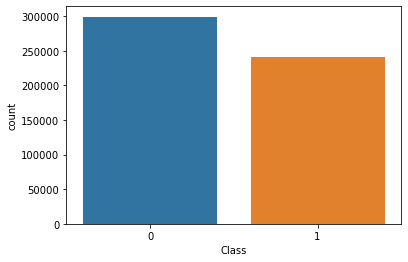

In [23]:
sns.countplot(x=df["Class"])

In [24]:
# creatating two different dataframe of majority and minority class
df_majorty = df[(df["Class"] == 0)]
df_minority = df[(df["Class"] == 1)]

# upsample minority class
df_minority_unsampled = resample(df_minority,replace=True,n_samples=299118,random_state=0)

#Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_unsampled,df_majorty])

In [26]:
df_upsampled["Class"].value_counts()

1    299118
0    299118
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

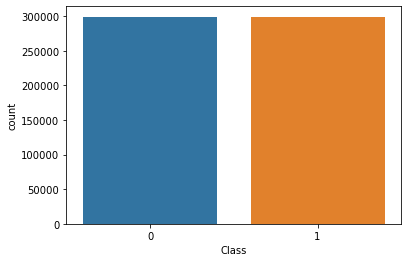

In [27]:
sns.countplot(x=df_upsampled["Class"])

# Checking the Outliers

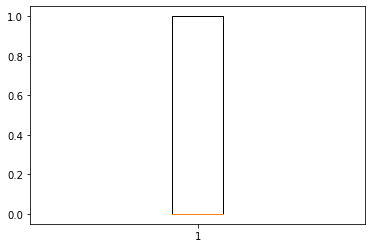

<Figure size 720x504 with 0 Axes>

In [28]:
plt.boxplot(df["Class"])
fig = plt.figure(figsize=(10,7))
plt.show()

In [29]:
#Removing Outlier using Z-Score Method

z = np.abs(stats.zscore(df_upsampled))
data_clean = df_upsampled[(z<3).all(axis=1)]
data_clean.shape

(587262, 7)

# Attribute Correlation

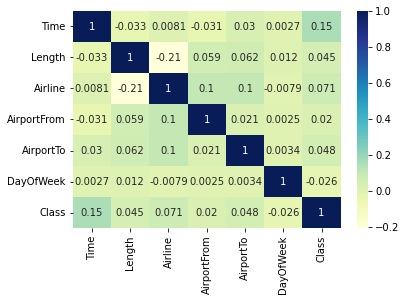

In [30]:
dataplot = sns.heatmap(data_clean.corr(),cmap="YlGnBu",annot=True)

plt.show()

In [31]:
data_clean

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
468546,920.0,87.0,17,251,60,1,1
103390,1295.0,128.0,0,85,26,6,1
412980,450.0,146.0,8,173,159,7,1
267511,840.0,157.0,5,197,22,3,1
416258,880.0,195.0,1,22,183,4,1
...,...,...,...,...,...,...,...
515350,1149.0,87.0,12,93,253,4,0
515351,420.0,93.0,7,79,172,2,0
515352,515.0,160.0,11,27,159,5,0
515353,1080.0,100.0,10,107,208,2,0


In [32]:
x = data_clean.drop("Class",axis=1)
y = data_clean["Class"]

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Decision Tree Classifier

In [34]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train,y_train)

y_pred = dtree.predict(x_test)
print("Accuracy Score : ",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score :  68.09 %


In [41]:
print('F-1 Score: ',(f1_score(y_test,y_pred)))
print('Precision Score: ',(precision_score(y_test,y_pred)))
print('Recall Score: ',(recall_score(y_test, y_pred)))

F-1 Score:  0.572576568858428
Precision Score:  0.5749062381722465
Recall Score:  0.5702657041929043


# Random Forest Classifer

In [36]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)

y_pred = rfc.predict(x_test)
print('Accuarcy Score: ', round(accuracy_score(y_test, y_pred)*100, 2),'%')

Accuarcy Score:  69.89 %


In [37]:
print('F-1 Score: ',(f1_score(y_test,y_pred)))
print('Precision Score: ',(precision_score(y_test,y_pred)))
print('Recall Score: ',(recall_score(y_test, y_pred)))

F-1 Score:  0.7072126886366834
Precision Score:  0.6867303302144625
Recall Score:  0.7289544190173893


In [38]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print("Accuracy Score: ",round(accuracy_score(y_test, y_pred)*100,2),"%")

Accuracy Score:  57.52 %


In [39]:
print('F-1 Score: ',(f1_score(y_test,y_pred)))
print('Precision Score: ',(precision_score(y_test,y_pred)))
print('Recall Score: ',(recall_score(y_test, y_pred)))

F-1 Score:  0.572576568858428
Precision Score:  0.5749062381722465
Recall Score:  0.5702657041929043


# Visualisation of Random Forest Classifier

Text(0.5, 1.0, 'Accuracy Score : 69.8866780754855')

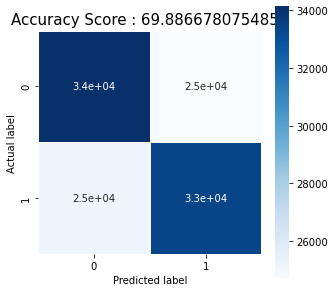

In [42]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap="Blues")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score : {0}".format(rfc.score(x_test,y_test)*100)
plt.title(all_sample_title,size=15)

In [43]:
imp_df = pd.DataFrame({
    "Feature Name" : x_train.columns,
    "Importance" : rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance",ascending=False)
fi

,Feature Name,Importance
0,Time,0.264537
5,DayOfWeek,0.239242
1,Length,0.177447
3,AirportFrom,0.110214
2,Airline,0.108437
4,AirportTo,0.100123


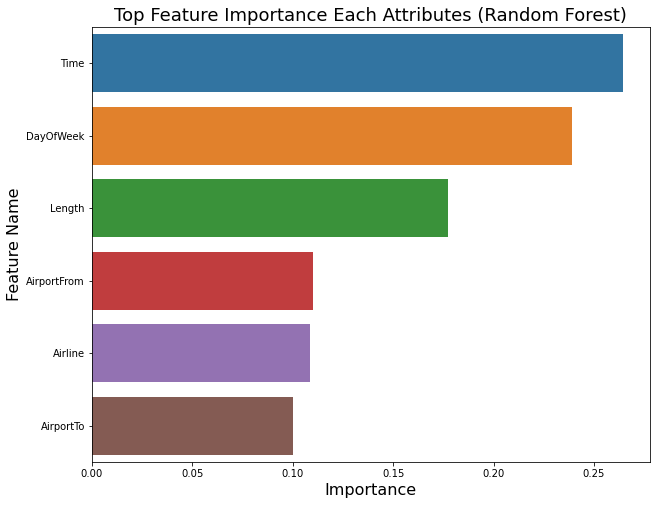

In [44]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()